# IÐN303G Tæknileg kerfi - Forritunaræfing 2

## Inngangur
Markmiðið með þessari æfingu er að þjálfast í byggingu líkana af vélrænum og rafrænum kerfum.

Æfingin er í tveimur hlutum. Í fyrri hlutanum eru byggð tvö líkön af fjöðrun bifreiðar og þau borin saman. Í seinni
hlutanum er gert líkan af kerfi sem samanstendur af hljóðnema, magnara og hátalara og skoðað hvernig eiginleikar 
magnarans hafa áhrif á aflið sem skilar sér út í hátalarann. 

## Fjöðrun bifreiðar
Á eftirfarandi mynd, sem fengin er að láni hjá [Toyota](https://www.toyotaofnorthcharlotte.com/blog/a-closer-look-at-the-car-suspension-system/), má sjá fjaðrakerfi bifreiðar.

<div>
<img src="https://github.com/rsaemundsson/idn303_technical_systems/blob/main/ex2_supsension_system.png?raw=true", width=600>


Hægt er að byggja mismunandi flókin líkön af þessu kerfi með því að tengja saman dempara, fjaðrir og massa.

Við byrjum á að skoða líkan sem við köllum viðmiðunarlíkan. Síðan eigið þið að útbúa einfaldað líkan og 
bera það saman við viðmiðunarlíkanið. Hversu mikið betra er viðmiðunarlíkanið? Hvenær skiptir það máli?

### Viðmiðunarlíkan
Grunnbyggingu viðmiðunarlíkansins má sjá á eftirfarandi mynd.

<div>
<img src="https://github.com/rsaemundsson/idn303_technical_systems/blob/main/ex2_suspension_reference.png?raw=true", width=600>

Á myndinni er gert ráð fyrir að $m_1$ sé fjórðungur af massa
bílsins og að undirvagn og hjólafesting tengist með hliðtengdum deyfi ($c$) og fjöður ($k_1$). Einnig er gert ráð 
fyrir að $m_2$ sé samanlagður massi hjóls og dekks og að dekkið fjaðri ($k_2$). Við höfum áhuga á að skoða tengslin
á milli lóðréttrar færslu undirvagnsins/bílsins ($y$) og lóðréttrar færslu vegna ójafna í veginum. Gert er ráð fyrir
að kerfið sé í stöðujafnvægi í upphafi (vinnupunktur) þannig að ekki þarf að taka tillit til þyngdarkrafts.

Eftirfarandi mynd sýnir blokkmynd af kerfinu fyrir breytingar í kringum vinnupunkt.

<div>
<img src="https://github.com/rsaemundsson/idn303_technical_systems/blob/main/ex2_suspension_reference_block_diagram.png?raw=true", width=600>
                                                                        
Með því að setja upp kraftajafnvægi fyrir massana fæst eftirfarandi líkan á ástandsformi (sjá dæmi 5.3.10 í hefti):

\begin{equation}
A=
\begin{bmatrix}
0 & 1 & 0 & 0\\
-\frac{k_1}{m_1} & -\frac{c}{m_1} & \frac{k_1}{m_1} & \frac{c}{m_1}\\
0 & 0 & 0 & 1\\
\frac{k_1}{m_2} & \frac{c}{m_2} & -\frac{k_1+k_2}{m_2} & -\frac{c}{m_2}                                                                        
\end{bmatrix}
\end{equation}
                                                         
\begin{equation}
B=
\begin{bmatrix}
0\\ 0 \\ 0 \\ \frac{k_2}{m_2}                                                        
\end{bmatrix}
\end{equation}

\begin{equation}
C=
\begin{bmatrix}
1 & 0 & 0 & 0                                                        
\end{bmatrix}
\end{equation}

\begin{equation}
D=0
\end{equation}

þar sem ástandsbreyturnar eru:
\begin{equation}
x=
\begin{bmatrix}
y\\ \dot{y} \\ z \\ \dot{z}                                                        
\end{bmatrix}
\end{equation}
                                                                        
og
                                                                        
\begin{equation}
\dot{x}=Ax+Bu\\
y=Cx+Du                                                                        
\end{equation}               

Við setjum upp og hermum líkanið með því að nota raunhæf gildi fyrir stika þess frá https://www.researchgate.net/publication/237899633_Pole_location_control_design_of_an_active_suspension_system_with_uncertain_parameters 

In [ ]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

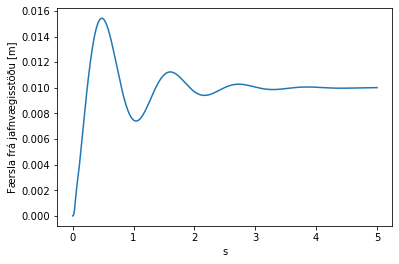

In [136]:
# Parameter values

mass_quarter_chassis_m_1 = 289
spr_coeff_suspension_k_1 = 10000
damp_coeff_suspension_c = 850
mass_tire_m_2 = 29
spr_coeff_tire_k_2 = 155900


# State space model

A = [[0,1,0,0], 
     np.divide([-spr_coeff_suspension_k_1,-damp_coeff_suspension_c,spr_coeff_suspension_k_1,damp_coeff_suspension_c],mass_quarter_chassis_m_1),
     [0,0,0,1],
     np.divide([spr_coeff_suspension_k_1,damp_coeff_suspension_c,-(spr_coeff_suspension_k_1 + spr_coeff_tire_k_2),-damp_coeff_suspension_c],mass_tire_m_2)
    ]

B = [[0],[0],[0],[spr_coeff_tire_k_2 / mass_tire_m_2]]
C = [1,0,0,0]
D = [0]

# Simulation

delta_t = 0.01 # sec
duration = 5 # sec
step_size = 0.01 # m
N_simulation = int(duration / delta_t)

sys = signal.StateSpace(A,B,C,D)

t = np.linspace(0,duration,N_simulation)
u = step_size * np.ones(N_simulation)
tout, yout, xout = signal.lsim(sys,u,t)

fig, ax = plt.subplots()
ax.set_xlabel('s')
ax.set_ylabel('Færsla frá jafnvægisstöðu [m]')

ax.plot(tout, yout)

plt.show()

Í hermuninni skoðuðum við hvernig færslan á undirvagninum breytist þegar yfirborð vegarins hækkar skyndilega, þ.e.
það er eins og bifreiðin fari yfir brún í malbikinu. Hvað gerist ef þið í staðin látið yfirborð vegarins breytast 
eins og sinus bylgja, t.d. $u=sin(15t)$? Hvað gerist þegar þið minnkið eða aukið sveiflutíma sinus bylgjunnar?

### Einfaldara líkan
Grunnbyggingu einfaldara líkansins má sjá á eftirfarandi mynd. 

<div>
<img src="https://github.com/rsaemundsson/idn303_technical_systems/blob/main/ex2_suspension_simplified.png?raw=true", width=600>

Eins og áður er gert ráð fyrir að $m_1$ sé fjórðungur af massa
bílsins og að undirvagn og hjólafesting tengist með hliðtengdum deyfi ($c$) og fjöður ($k_1$). Hins vegar er ekki
tekið tillit til massa og fjöðrunar í hjólinu.

Setjið upp og hermið einfaldaða líkanið.

### Samanburður

Berið saman niðurstöðurnar einfalda líkansins við niðurstöður viðmiðunarlíkansins. Breytið kóðanum að ofan og skrifið 
nýjan kóða sem hjálpar ykkur að bera tölulega saman eftirfarandi þætti fyrir sama innmerki:
    
    - Jafnvægisgildi
    - Viðbragðshraða
    - Yfirskot
    - Uppsöfnuð frávik í úttaki einfalda líkansins miðað við viðmiðunarlíkanið.

Hversu mikið betra er viðmiðunarlíkanið?

Hvaða stikar í líkaninu/kerfinu geta haft áhrif á það hversu mikið betra viðmiðunarlíkanið er?

## Hljóðnemi, magnari og hátalari

Á eftirfarandi mynd sést grunnuppbygging af líkani sem tengir saman hljóðnema, magnara og hátalara.

<div>
<img src="https://github.com/rsaemundsson/idn303_technical_systems/blob/main/ex2_amplifier.png?raw=true", width=800>

Hljóðneminn er settur fram sem spennulind ($u$) sem er tengd við viðnám ($R_m$). Hann tengist við magnara þar sem
spennan ($u_{in}$) yfir innviðnámið ($R_{in}$) stýrir spennulind ($A_0u_{in}$) sem er tengd við útganginn í gegnum viðnám 
($R_{out}$). Magnarinn tengist að lokum við hátalarann sem er settur fram sem viðnám ($R_s$).

Skrifið kóða sem hjálpar ykkur að skoða hvernig $v_{out}$ og aflið sem skilar sér til hátalarans er háð  
stikum magnarans (gefið að við getum ekki breytt stikum hljóðnemans og hátalarans).

Gerið ráð fyrir að $R_m=3k\Omega$, $R_s=8\Omega$, $u_1=3mV$ og $A_0=145$. 

Fyrir hvaða gildi á $R_{in}$ og $R_{out}$ er mestu afli skilað til hátalarans?